# Assignment 3 - Pandas

### Name: Pranisaa Charnparttaravanit 
### ID: st121720

In [521]:
import pandas as pd
import numpy as np
import random

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 USD
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - %lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's



1. Loading data resources/boston_housing_delimiter.csv to pandas
make sure it's properly split
check shape
check head

In [522]:
#==============Q1===============#
df = pd.read_csv('boston_housing_delimiter.csv',delimiter = ';', dtype=float)
print("Check headers: ",df.head())
print("Check shape: ",df.shape)

Check headers:        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Check shape:  (506, 14)


2. .head() gives all columns.  Sometimes it is useful to see only a few cols.
Select only Age and Tax and perform .head()

In [486]:
#==============Q2===============#
df[['AGE','TAX']].head()

,AGE,TAX
0,65.2,296.0
1,78.9,242.0
2,61.1,242.0
3,45.8,222.0
4,54.2,222.0


3. retrieve age columns greater than 95.
calculate the percentage.
show only TAX column for housing of age greater than 95 using head().

In [526]:
#==============Q3===============#
data_age_percentage = (df[(df['AGE']>95)]['AGE'].count()/df['AGE'].shape[0])*100
print(data_age_percentage)
print("TAX column for housing of age greater than 95\n", df[(df['AGE']>95)]['TAX'].head())

21.936758893280633
TAX column for housing of age greater than 95
 7     311.0
8     311.0
20    307.0
23    307.0
31    307.0
Name: TAX, dtype: float64


4. I want boston housing connected to highways with RAD at least 6 and where DIS is lower than average DIS.
Count how many houses are like that.

In [602]:
#==============Q4===============#
aa = pd.DataFrame({'RAD':df['RAD']>=6, 'DIS':df['DIS']< df['DIS'].mean()})
df[aa.all(axis=1)]

#==============Option2===============#
# cond1 = df['RAD']>=6
# cond2 = df['DIS']< df['DIS'].mean()
# print(df[cond1 & cond2].head())
# print("number of houses that fulfilled such conditions: ",df[cond1 & cond2].shape[0])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8
113,0.22212,0.0,10.01,0.0,0.547,6.092,95.4,2.5480,6.0,432.0,17.8,396.90,17.09,18.7
114,0.14231,0.0,10.01,0.0,0.547,6.254,84.2,2.2565,6.0,432.0,17.8,388.74,10.45,18.5
115,0.17134,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6.0,432.0,17.8,344.91,15.76,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5


5. using df.columns, loop through and perform sum for each columns

In [489]:
#==============Q5===============#
for col in df.columns:
    sum_by_col = df[col].sum()
    print(f"Sum of {col} column", sum_by_col)

Sum of CRIM column 1828.4429200000004
Sum of ZN column 5750.0
Sum of INDUS column 5635.209999999999
Sum of CHAS column 35.0
Sum of NOX column 280.6757
Sum of RM column 3180.025
Sum of AGE column 34698.9
Sum of DIS column 1920.2916
Sum of RAD column 4832.0
Sum of TAX column 206568.0
Sum of PTRATIO column 9338.5
Sum of B column 180477.06000000003
Sum of LSTAT column 6402.450000000001
Sum of MEDV column 11401.600000000002


6. using df.columns, loop through them and perform rename to lowercase

In [603]:
#==============Q6===============#
for col in df.columns:
    df.columns = df.columns.str.lower()
df
##### Option 2 ######
# df.columns
# df = df.rename(columns = {x:x.lower() for x in df.columns})
# df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


7. convert column RAD to int type

In [491]:
#==============Q7===============#
#capitalizing column names
df.columns
df = df.rename(columns = {x:x.upper() for x in df.columns})
df

df['RAD'] = df['RAD'].astype(int)
df['RAD']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: int64

8. drop all columns with DIS greater than DIS mean.

in addition, drop CHAS column.

df.drop (remember it's not inplace!)

In [492]:
#==============Q8===============#
condition = df['DIS'] > df['DIS'].mean()
idx = df[condition].index
print(idx)
df.drop(index = idx,columns="CHAS" , inplace=True)
print(df)


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            348, 349, 350, 351, 352, 353, 354, 355, 483, 485],
           dtype='int64', length=208)
        CRIM   ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
33   1.15172  0.0   8.14  0.538  5.701  95.0  3.7872    4  307.0     21.0   
34   1.61282  0.0   8.14  0.538  6.096  96.9  3.7598    4  307.0     21.0   
35   0.06417  0.0   5.96  0.499  5.933  68.2  3.3603    5  279.0     19.2   
36   0.09744  0.0   5.96  0.499  5.841  61.4  3.3779    5  279.0     19.2   
87   0.07151  0.0   4.49  0.449  6.121  56.8  3.7476    3  247.0     18.5   
..       ...  ...    ...    ...    ...   ...     ...  ...    ...      ...   
501  0.06263  0.0  11.93  0.573  6.593  69.1  2.4786    1  273.0     21.0   
502  0.04527  0.0  11.93  0.573  6.120  76.7  2.2875    1  273.0     21.0   
503  0.06076  0.0  11.93  0.573  6.976  91.0  2.1675    1  273.0     21.0   
504  0.10959  0.0  11.93  0.573  6.794  89.3  2.388

9. check if housing is priced higher when nearer to highways.

i.e., show mean of MEDV group by RAD

In [493]:
#==============Q9===============#
df.groupby('RAD')['MEDV'].aggregate(np.mean)

RAD
1     20.160000
2     24.900000
3     34.644444
4     18.058333
5     25.998507
6     20.005882
7     30.000000
8     33.700000
24    16.325385
Name: MEDV, dtype: float64

10. let's add some arbitrary zip codes to the dataset.

<code>zipcodes = [101, 102, 103, np.nan]</code>

<code>df['zip_code'] = pd.Series([random.choice(zipcodes) for i in df.index])</code>

check any missing values.

replace with majority  #mode return a series, use [0] to get the number.

check again any missing values.

In [494]:
#==============Q10===============#
zipcodes = [101, 102, 103, np.nan]

df['zip_code'] = pd.Series([random.choice(zipcodes) for i in df.index])
df.isna().sum()
# df['zip_code'].value_counts()

df['zip_code'].fillna(df['zip_code'].mode()[0], inplace=True)
# df.isna().sum()

11. Here is another dataset with zip codes and corresponding electricity rate, and water rate

<code>zip_dict = {'zip_code' : [101, 102, 103], 'e_rate': [5.643, 2.234, 13.42],'w_rate': [1.21, 1.23, 1.99]}</code>

<code>zip_df = pd.DataFrame.from_dict(zip_dict)</code>

<code>zip_df.head()</code>

merge them with the existing dataset, so every row has e_rate and w_rate

In [495]:
#==============Q11===============#
zip_dict = {'zip_code' : [101, 102, 103], 'e_rate': [5.643, 2.234, 13.42],'w_rate': [1.21, 1.23, 1.99]}

zip_df = pd.DataFrame.from_dict(zip_dict)

zip_df.head()

df.merge(right = zip_df, how="left", on="zip_code")

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,zip_code,e_rate,w_rate
0,1.15172,0.0,8.14,0.538,5.701,95.0,3.7872,4,307.0,21.0,358.77,18.35,13.1,103.0,13.420,1.99
1,1.61282,0.0,8.14,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5,102.0,2.234,1.23
2,0.06417,0.0,5.96,0.499,5.933,68.2,3.3603,5,279.0,19.2,396.90,9.68,18.9,102.0,2.234,1.23
3,0.09744,0.0,5.96,0.499,5.841,61.4,3.3779,5,279.0,19.2,377.56,11.41,20.0,101.0,5.643,1.21
4,0.07151,0.0,4.49,0.449,6.121,56.8,3.7476,3,247.0,18.5,395.15,8.44,22.2,103.0,13.420,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,103.0,13.420,1.99
294,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,103.0,13.420,1.99
295,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,103.0,13.420,1.99
296,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,103.0,13.420,1.99


# Apple Stock

In [496]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

apple = pd.read_csv("appl_1980_2014.csv")
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


12. Transform date column to datetime type.

Then set the date column as index and filter only with year not less than 1987

In [497]:
#==============Q12===============#
cols = ['Date']
apple.Date = pd.to_datetime(apple.Date)
apple = apple[apple['Date'].dt.year > 1986]
apple = apple.set_index(cols)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1987-01-08,44.75,45.12,44.50,44.75,72800000,0.70
1987-01-07,43.87,44.88,43.63,44.75,108640000,0.70
1987-01-06,43.13,44.00,42.62,43.75,81200000,0.68


13. use index.is_unique to check whether all index are unique

In [498]:
#==============Q13===============#
idx = pd.Index(['Date','Open','High','Low','Close','Volume','Adj Close'])
result = idx.is_unique
print(result)

True


14. Sort the index in a ascending order (oldest date first) - use sort_index

In [499]:
#==============Q14===============#
apple = apple.sort_index(ascending=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1987-01-02,40.37,41.13,40.13,40.87,30217600,0.64
1987-01-05,41.25,43.25,41.00,43.00,59920000,0.67
1987-01-06,43.13,44.00,42.62,43.75,81200000,0.68
1987-01-07,43.87,44.88,43.63,44.75,108640000,0.70
1987-01-08,44.75,45.12,44.50,44.75,72800000,0.70
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


15. I want to know how apple does on end of every month, thus get the mean value for each columns, resample at last buiness day of each month (i.e., BM)

In [500]:
#==============Q15===============#
import matplotlib.pyplot as plt
# apple_close = apple[['Close']]

apple_by_month = apple.resample('BM').mean()
# apple_close.plot(alpha=0.2,style='-')
# apple_close.resample('BM').mean().plot(style = 'o')
apple_by_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1987-01-30,48.119048,49.666667,47.165714,48.732857,9.843947e+07,0.759524
1987-02-27,59.625789,61.262632,58.513158,60.382632,8.705495e+07,0.940000
1987-03-31,66.363636,67.505909,65.135909,66.221818,6.771953e+07,1.031364
1987-04-30,71.565238,73.451905,70.565714,72.196667,8.110907e+07,1.124286
1987-05-29,77.750000,78.906500,76.756500,77.818500,4.798696e+07,1.213500
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


16. BTW, how many months do we have in our data?

In [501]:
#==============Q16===============#
apple_by_month.shape[0]

331

17. Compare this year and last year High column.

Explain what do you see. 

You may use .plot() for easy visualization

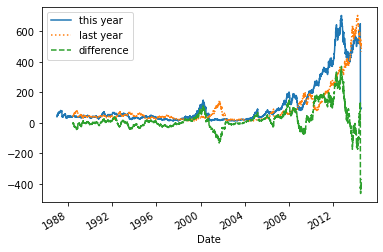

In [502]:
#==============Q17===============#
import matplotlib.pyplot as plt

apple_high = apple['High']
apple_high_last_year =apple_high.shift(365)
apple_high.plot(style=['-'], label='this year')
apple_high_last_year.plot(style=[':'],label='last year')

diff = apple_high - apple_high_last_year
diff.plot(style=["--"],label='difference')
plt.legend()

18. Resample to 3 years and run .plot()

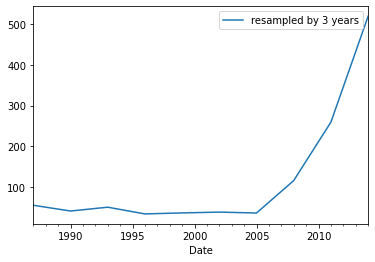

In [503]:
#==============Q18===============#
apple_by_3years = apple['High'].resample('3A').mean()
apple_by_3years.plot(style=['-'], label='resampled by 3 years')
plt.legend()

19. Perform a rolling mean (moving average) of Close with window size of 100 days

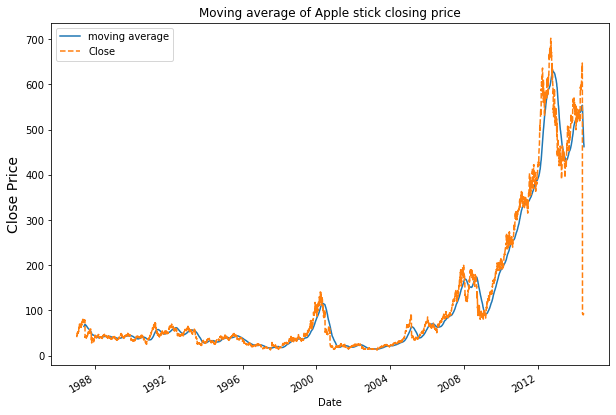

In [504]:
#==============Q19===============#
apple_mvavg = apple['Close'].rolling(window=100).mean()
apple_close = apple['Close']
apple_mvavg.plot(style=['-'], label='moving average')
apple_close.plot(style='--', figsize=(10, 7))
plt.title("Moving average of Apple stick closing price")
plt.ylabel('Close Price', fontsize=14)
plt.legend()
plt.show()

20. let's compare them based on return rate based on the first day of IPO.

i.e., close price / close price [0], where [0] is the first close price.

To make things even more interesting, we shall look at the performance from year 2000 onwards....

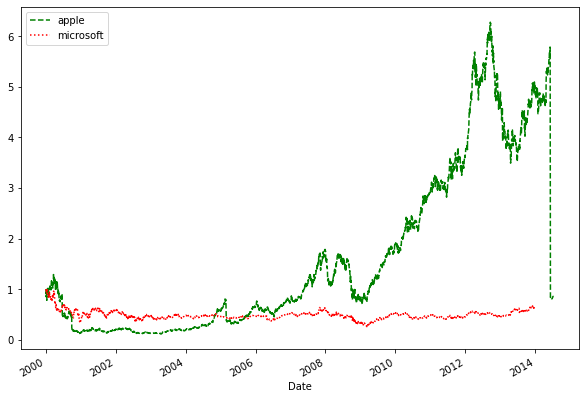

In [515]:
#==============Q20===============#
import os

os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'

from pandas_datareader import data

microsoft = data.DataReader('MSFT', start='1987', end='2014',
                      data_source='yahoo')

microsoft.head()
microsoft_close = microsoft['Close']
apple_close = apple['Close']
microsoft_2000 = microsoft_close['2000':]
apple_2000 = apple_close['2000':]

apple_return = apple_2000.apply(lambda x: x / apple_2000[0])
microsoft_return = microsoft_2000.apply(lambda x: x / microsoft_2000[0])

apple_return.plot(style=["g--"],label ='apple',figsize=(10, 7))
microsoft_return.plot(style=["r:"],label = 'microsoft')
plt.legend()

# Euro CUP

In [ ]:
euro = pd.read_csv("euro2012.csv")
euro.head()

21. let's check which country get the most red cards and yellow cards

In [ ]:
###--------------------------------------------###
# sum_cards = euro['Red Cards']+euro['Yellow Cards']
# print("max Index:",sum_cards.argmax())
# euro.iloc[7,:]

#==============Q21===============#
euro_cards = euro[['Team','Red Cards','Yellow Cards']].sort_values(['Red Cards','Yellow Cards'],ascending=False)
euro_cards

22. check which team score more than 6 goals

In [ ]:
#==============Q22===============#
euro_6 = euro['Goals']>6
euro_m6 = euro[euro_6]
euro_m6

23. select team starting with 'C'

In [600]:
# filter_team = [team for team in euro['Team'] if team.startswith('C')]

#### By P'Jo#####
# # filter_team
# # idx = filter_team.index
# # print(idx)
# # euro.loc(filter_team[0])
# # print(filter_team)
# # euro['Team']
# # help(euro.loc)
# cond = []
# for team in filter_team:
# #     euro.loc['Team']
#     cond.append(euro['Team']==team)
# #     print(euro['Team']==team)
# # euro
# cond = np.array(cond)
# cond.any(axis=0)
# aa = pd.DataFrame({'Team':cond.any(axis=0)})
# aa.all(axis=1)


#==============Q23===============#
euro[euro['Team'].str.startswith('C')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used,luck_index,alway_lose_goals
0,Croatia,4,13,12,51.9%,0.160,32,0,0,0,...,41,62,2,9,0,9,9,16,High,True
1,Czech Republic,4,13,18,41.9%,0.129,39,0,0,0,...,53,73,8,7,0,11,11,19,High,False


24. select all columns except the last 3

In [ ]:
#==============Q24===============#
euro.iloc[:,:-3]

25. create new column luck_index which is based on Hit Woodwork.  

pd.cut to create three bins of luck index.

give labels as High, Medium, Low.

In [ ]:
#==============Q25===============#
euro['luck_index'] = pd.cut(euro['Hit Woodwork'], 3, labels=["High", "Medium", "Low"])
euro

26. create new column "always_lose_goals" which has values of True or False based on clean sheets, if clean sheets is 0, then is True, otherwise False

In [ ]:
#==============Q26===============#
def no_clean_sheets(x):
    if x == 0:
        return True
    else:
        return False

euro['alway_lose_goals'] = euro['Clean Sheets'].apply(no_clean_sheets)
euro

27. let's find out whether our luck_index works.

group by luck_index, find the mean of goals and % Goals-to-shots

In [ ]:
#==============Q27===============#
def converter(x):
    return float(x.strip('%'))/100

euro['% Goals-to-shots'] = euro['% Goals-to-shots'].apply(converter)

euro.groupby(['luck_index']).agg({'Goals':'mean', '% Goals-to-shots':'mean'},axis="columns")